<a href="https://colab.research.google.com/github/kr19al0711/cs985-spotify-regression-lakkh/blob/draft%2F1222025/CS985_Regression_Spotify_1222025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

cs_985_6_spotify_regression_problem_2025_path = kagglehub.competition_download('cs-985-6-spotify-regression-problem-2025')

print('Data source import complete.')


100%|██████████| 22.1k/22.1k [00:00<00:00, 4.12MB/s]

Extracting files...
Data source import complete.


In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [128]:
# Import training and testing datasets
spotify_train = pd.read_csv(cs_985_6_spotify_regression_problem_2025_path + "/CS98XRegressionTrain.csv")
spotify_test = pd.read_csv(cs_985_6_spotify_regression_problem_2025_path + "/CS98XRegressionTest.csv")


In [129]:
spotify_train.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [130]:
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


There are 3 categorical variables title, artist and top genre.
Also the top genre feature has Null values that would have to be dealt with.

# EDA

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'bpm'}>],
       [<Axes: title={'center': 'nrgy'}>,
        <Axes: title={'center': 'dnce'}>, <Axes: title={'center': 'dB'}>],
       [<Axes: title={'center': 'live'}>,
        <Axes: title={'center': 'val'}>, <Axes: title={'center': 'dur'}>],
       [<Axes: title={'center': 'acous'}>,
        <Axes: title={'center': 'spch'}>,
        <Axes: title={'center': 'pop'}>]], dtype=object)

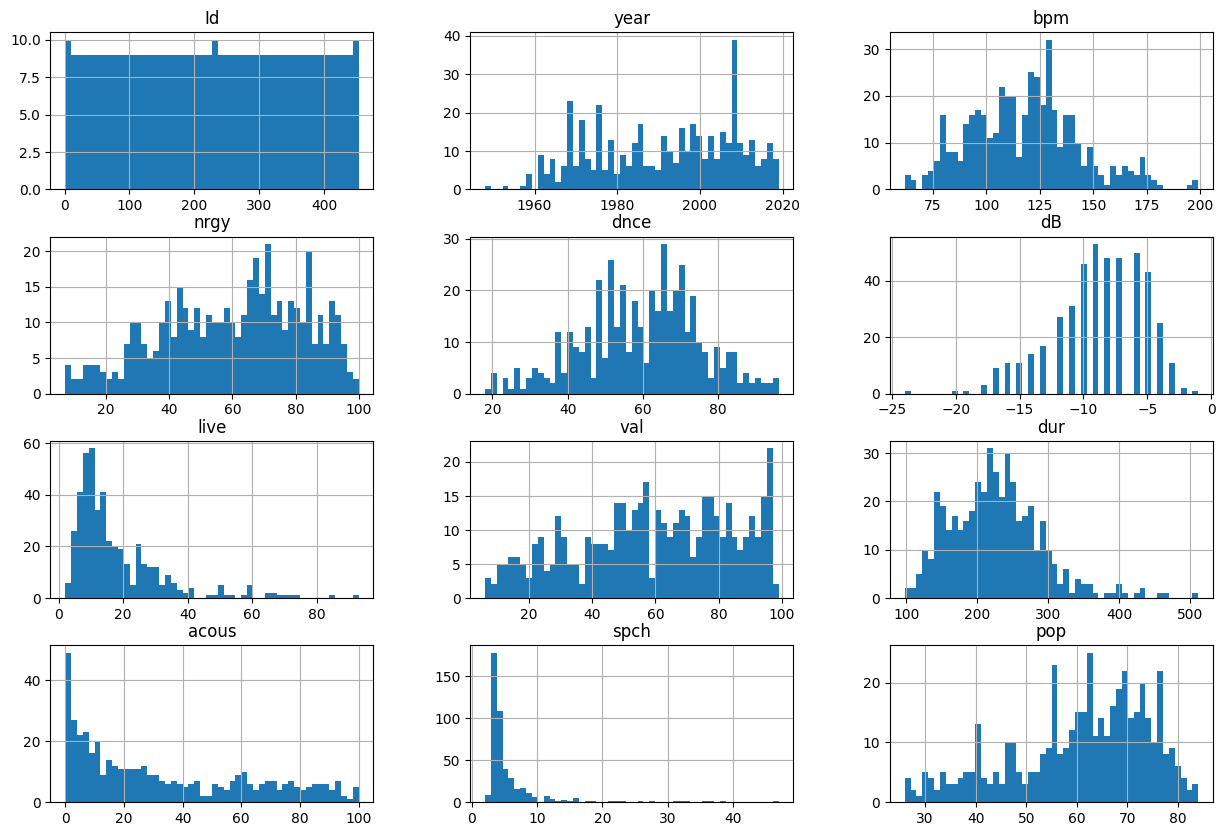

In [131]:
spotify_train.hist(bins=50, figsize=(15,10))

<Axes: >

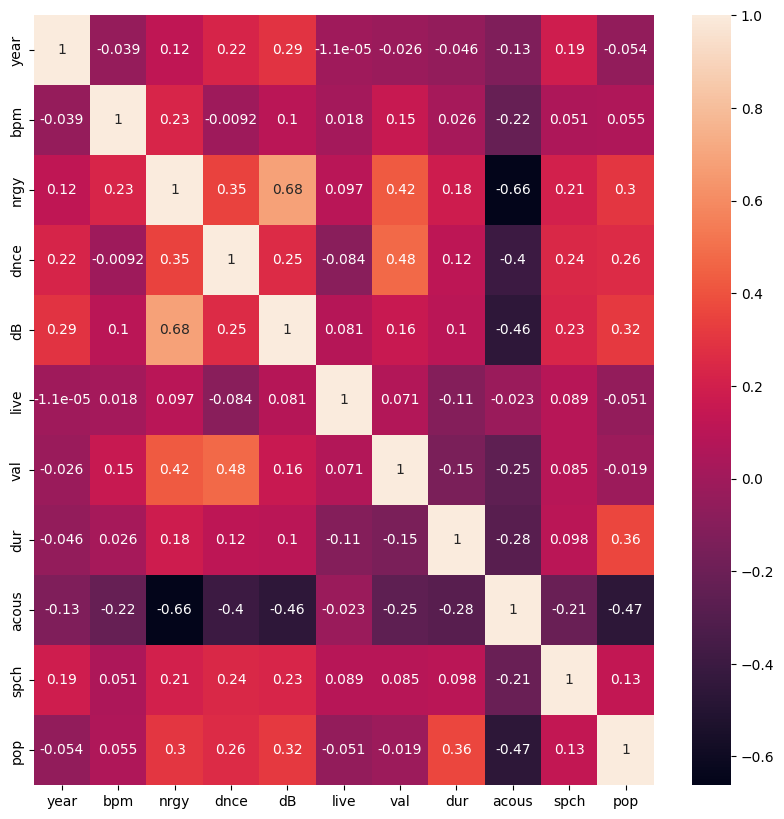

In [132]:
spotify_train_numeric = spotify_train.drop(['Id','title', 'artist', 'top genre'], axis=1)
spotify_corr = spotify_train_numeric.corr()
plt.figure(figsize=(10,10))
sns.heatmap(spotify_corr, annot=True)

In [133]:
# Correlation of features with Popularity scores
spotify_corr['pop'].sort_values(ascending=False)

,pop
pop,1.000000
dur,0.363266
dB,0.316854
nrgy,0.303797
dnce,0.258670
spch,0.130955
bpm,0.055024
val,-0.018713
live,-0.051364
year,-0.054293


In [134]:
include_features = ['nrgy', 'dnce', 'dB', 'dur', 'acous', 'spch']
label = ['pop']

X = spotify_train[include_features]
y = spotify_train[label]


In [148]:
X.head()

,nrgy,dnce,dB,dur,acous,spch
0,31,45,-8,150,75,3
1,44,53,-8,139,49,3
2,36,63,-9,245,11,3
3,28,47,-16,232,25,3
4,47,56,-8,193,45,3


In [155]:
scaler = StandardScaler()
X_standardized = pd.DataFrame(columns=include_features, data = scaler.fit_transform(X))
X_standardized.head()

,nrgy,dnce,dB,dur,acous,spch
0,-1.310624,-0.941668,0.234142,-1.197460,1.424453,-0.479767
1,-0.724531,-0.424450,0.234142,-1.370145,0.543019,-0.479767
2,-1.085204,0.222073,-0.045716,0.293907,-0.745230,-0.479767
3,-1.445876,-0.812364,-2.004725,0.089825,-0.270612,-0.479767
4,-0.589278,-0.230493,0.234142,-0.522420,0.407414,-0.479767


In [156]:
# X_train, X_validate, y_train, y_validate = train_test_split(X_standardized, y, test_size=0.2, random_state=19)

In [157]:
X_standardized.describe()

,nrgy,dnce,dB,dur,acous,spch
count,4.530000e+02,4.530000e+02,4.530000e+02,4.530000e+02,4.530000e+02,4.530000e+02
mean,-1.862626e-17,-1.901839e-16,1.333248e-16,1.333248e-16,6.274108e-17,5.881976e-17
std,1.001106e+00,1.001106e+00,1.001106e+00,1.001106e+00,1.001106e+00,1.001106e+00
min,-2.392643e+00,-2.687280e+00,-4.243592e+00,-2.013787e+00,-1.118144e+00,-6.601274e-01
25%,-7.696147e-01,-6.830593e-01,-6.054331e-01,-7.108034e-01,-8.808348e-01,-4.797669e-01
50%,1.320676e-01,9.276818e-02,2.341420e-01,-5.146229e-02,-3.045129e-01,-2.994064e-01
75%,8.083293e-01,6.746388e-01,7.938587e-01,5.607830e-01,8.481309e-01,6.131460e-02
max,1.800180e+00,2.355598e+00,2.193150e+00,4.469734e+00,2.271985e+00,7.456095e+00


In [158]:
linearRegression = LinearRegression()
linearRegression.fit(X_standardized, y)

LinearRegression()

In [159]:
y_predict = linearRegression.predict(spotify_test[include_features])

In [160]:
y_predict

array([[ 655.57687813],
       [ 846.89805051],
       [ 401.45140284],
       [ 634.56295425],
       [ 430.62245948],
       [ 800.07600105],
       [ 497.82061343],
       [ -20.59344295],
       [ 611.46247452],
       [ 603.32692457],
       [ 211.07456754],
       [ 881.2135525 ],
       [ 220.34546338],
       [ 618.72035503],
       [ 804.19055849],
       [ 808.37086371],
       [ 414.48757101],
       [ 595.90021494],
       [ 567.97499998],
       [ 681.88342801],
       [ 432.9387897 ],
       [ 311.02290496],
       [ 187.06634325],
       [ 224.2134907 ],
       [ 284.09718631],
       [ 771.7261606 ],
       [ 674.43628795],
       [ 393.4392172 ],
       [ 144.67996888],
       [ 698.31170292],
       [ 821.49896638],
       [ 250.22299447],
       [ 689.63823482],
       [ 835.52107497],
       [ 763.48868854],
       [ 730.63398683],
       [ 678.49944096],
       [ 272.85731658],
       [ 596.95899624],
       [ 921.32948886],
       [ 832.6086481 ],
       [1296.289